In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from datetime import datetime
import matplotlib.dates as mdates
from scipy.interpolate import interp1d
import statsmodels.api as sm

%matplotlib inline

/Users/dporter/anaconda2/envs/py36/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# ALL P3 data

In [2]:
basedir = 'data/P3_2017/LGS'
infile = 'OIB_P3_exportfromGeosoft.csv'
df = pd.read_csv(os.path.join(basedir, infile))
df['datestring'] = pd.to_datetime(df['unixtime'],unit='s')
df = df.set_index(pd.to_datetime(df['unixtime'],unit='s'))
df.head()

,Line,AccBiasX,AccBiasY,AccBiasZ,AccBiasZ_mgal,Corrected_Free_Air_DgS,diff_att_noatt,diff_oib_grav4,diff_oib_grav4_70,diff_oib_grav4_70_clip,...,Roll,seconds,static_en,static_st,unixtime,UTCDate,x,y,zbias_corr,datestring
unixtime,,,,,,,,,,,,,,,,,,,,,
2017-03-22 11:16:37,D2001,0.000633,-0.001196,-0.000103,-10.2868,108.571,1.007921,14.151178,14.084874,14.084874,...,0.097764,40597,-18.3,-23.9,1490181397,2017/03/22,-587786.161012,-1.342347e+06,18.613200,2017-03-22 11:16:37
2017-03-22 11:16:38,D2001,0.000637,-0.001183,-0.000108,-10.7741,110.105,1.231149,14.404454,13.962782,13.962782,...,0.097449,40598,-18.3,-23.9,1490181398,2017/03/22,-587790.379637,-1.342345e+06,18.125717,2017-03-22 11:16:38
2017-03-22 11:16:39,D2001,0.000641,-0.001176,-0.000113,-11.2547,110.393,1.342680,14.756877,13.857421,13.857421,...,0.086471,40599,-18.3,-23.9,1490181399,2017/03/22,-587797.003847,-1.342343e+06,17.644933,2017-03-22 11:16:39
2017-03-22 11:16:40,D2001,0.000646,-0.001169,-0.000115,-11.5110,109.255,1.463912,14.869320,13.768654,13.768654,...,0.033724,40600,-18.3,-23.9,1490181400,2017/03/22,-587806.107320,-1.342340e+06,17.388450,2017-03-22 11:16:40
2017-03-22 11:16:41,D2001,0.000652,-0.001164,-0.000119,-11.9362,106.520,1.438000,15.291789,13.696342,13.696342,...,0.001444,40601,-18.3,-23.9,1490181401,2017/03/22,-587817.675328,-1.342336e+06,16.963067,2017-03-22 11:16:41


In [3]:
# introduce some floats in our x-values
# df['imar_bias'] = df['grav_4_70_corr'] - df['oib_10_11_12']

df['imar_bias'] = df['grav_4_corr'] - df['oib_10_11_12']

In [10]:
x = df['unixtime']
y = df['imar_bias']

# lowess will return our "smoothed" data with a y value for at every x-value
my_frac = 0.5
lowess = sm.nonparametric.lowess(y, x, frac=my_frac)

# unpack the lowess smoothed points to their values
lowess_x = list(zip(*lowess))[0]
lowess_y = list(zip(*lowess))[1]

In [11]:
# df_temp['imar_bias_lowess'] = np.squeeze(lowess_y)
data=np.array([lowess_x, lowess_y]).T
lowess_index = pd.to_datetime(lowess_x,unit='s')
df_lowess = pd.DataFrame(data=data, index=lowess_index, columns=['unixtime','imar_bias_lowess'])
df_lowess.head()

# df['imar_bias_lowess'] = lowess_y

,unixtime,imar_bias_lowess
2017-03-22 11:16:37,1.490181e+09,2.618950
2017-03-22 11:16:38,1.490181e+09,2.618963
2017-03-22 11:16:39,1.490181e+09,2.618977
2017-03-22 11:16:40,1.490181e+09,2.618990
2017-03-22 11:16:41,1.490181e+09,2.619003


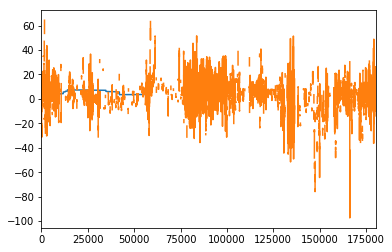

In [12]:
pd.merge_ordered(df, df_lowess, fill_method='ffill', how='inner')['imar_bias_lowess'].plot()
pd.merge_ordered(df, df_lowess, fill_method='ffill')['imar_bias'].plot()

In [13]:
df = pd.merge_ordered(df, df_lowess, fill_method='ffill', how='inner')
df['datestring'] = pd.to_datetime(df['unixtime'],unit='s')
df.set_index(pd.to_datetime(df['datestring'],unit='s'), inplace=True)
df.head()

,Line,AccBiasX,AccBiasY,AccBiasZ,AccBiasZ_mgal,Corrected_Free_Air_DgS,diff_att_noatt,diff_oib_grav4,diff_oib_grav4_70,diff_oib_grav4_70_clip,...,static_en,static_st,unixtime,UTCDate,x,y,zbias_corr,datestring,imar_bias,imar_bias_lowess
datestring,,,,,,,,,,,,,,,,,,,,,
2017-03-22 11:16:37,D2001,0.000633,-0.001196,-0.000103,-10.2868,108.571,1.007921,14.151178,14.084874,14.084874,...,-18.3,-23.9,1490181397,2017/03/22,-587786.161012,-1.342347e+06,18.613200,2017-03-22 11:16:37,14.748822,2.618950
2017-03-22 11:16:38,D2001,0.000637,-0.001183,-0.000108,-10.7741,110.105,1.231149,14.404454,13.962782,13.962782,...,-18.3,-23.9,1490181398,2017/03/22,-587790.379637,-1.342345e+06,18.125717,2017-03-22 11:16:38,14.495363,2.618963
2017-03-22 11:16:39,D2001,0.000641,-0.001176,-0.000113,-11.2547,110.393,1.342680,14.756877,13.857421,13.857421,...,-18.3,-23.9,1490181399,2017/03/22,-587797.003847,-1.342343e+06,17.644933,2017-03-22 11:16:39,14.142757,2.618977
2017-03-22 11:16:40,D2001,0.000646,-0.001169,-0.000115,-11.5110,109.255,1.463912,14.869320,13.768654,13.768654,...,-18.3,-23.9,1490181400,2017/03/22,-587806.107320,-1.342340e+06,17.388450,2017-03-22 11:16:40,14.030130,2.618990
2017-03-22 11:16:41,D2001,0.000652,-0.001164,-0.000119,-11.9362,106.520,1.438000,15.291789,13.696342,13.696342,...,-18.3,-23.9,1490181401,2017/03/22,-587817.675328,-1.342336e+06,16.963067,2017-03-22 11:16:41,13.607478,2.619003


Text(0,0.5,'$mGal$')

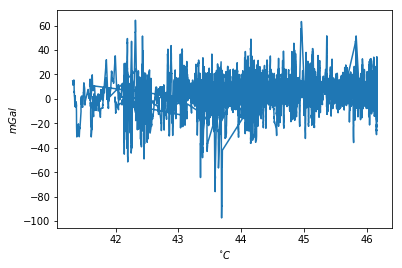

In [14]:
# plt.plot(df['imu_temp_C'].shift(periods=1, freq=lag_argmax), df['imar_bias'])
fig, ax = plt.subplots()
plt.plot(df['imu_temp_C'], df['imar_bias'])
ax.set_xlabel('$^{\circ}C$')
ax.set_ylabel('$mGal$')

In [15]:
# df[['imu_temp_C', 'imar_bias']].corr()
print(df.corr()['imar_bias'].tail())

x                   0.190152
y                  -0.132256
zbias_corr          0.048575
imar_bias           1.000000
imar_bias_lowess    0.227127
Name: imar_bias, dtype: float64


In [17]:
import statsmodels.formula.api as smf

ols=smf.ols('imar_bias_lowess ~ imu_temp_C', data=df).fit()
print(ols.summary())
ols.save('ols_results_OIB-P3_ALL.pickle')

                            OLS Regression Results                            
Dep. Variable:       imar_bias_lowess   R-squared:                       0.372
Model:                            OLS   Adj. R-squared:                  0.372
Method:                 Least Squares   F-statistic:                 3.401e+04
Date:                Thu, 24 May 2018   Prob (F-statistic):               0.00
Time:                        18:37:34   Log-Likelihood:            -1.0232e+05
No. Observations:               57483   AIC:                         2.046e+05
Df Residuals:                   57481   BIC:                         2.047e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -39.2055      0.241   -162.913      0.0

In [19]:
import statsmodels.formula.api as smf

# 2nd order polynomial
poly_2 = smf.ols('imar_bias_lowess ~ 1 + imu_temp_C + I(imu_temp_C ** 2.0)', data=df).fit()
print(poly_2.summary())
poly_2.save('poly_2_results_OIB-P3_ALL.pickle')

                            OLS Regression Results                            
Dep. Variable:       imar_bias_lowess   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                 1.920e+04
Date:                Thu, 24 May 2018   Prob (F-statistic):               0.00
Time:                        18:38:19   Log-Likelihood:            -1.0097e+05
No. Observations:               57483   AIC:                         2.019e+05
Df Residuals:                   57480   BIC:                         2.020e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              372.3136 

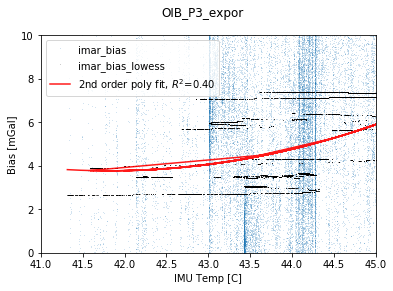

In [20]:
fig, ax = plt.subplots()
plt.plot(df.imu_temp_C, df.imar_bias, ',', alpha=0.2)
plt.plot(df.imu_temp_C, df.imar_bias_lowess, 'k,', alpha=0.2)
plt.plot(df.imu_temp_C, poly_2.predict(df), 'r-', 
         label='2nd order poly fit, $R^2$=%.2f' % poly_2.rsquared, 
         alpha=0.9)
plt.xlim((41, 45))
plt.ylim((0, 10))
plt.xlabel('IMU Temp [C]')
plt.ylabel('Bias [mGal]')
plt.legend(loc="upper left")
plt.suptitle(infile[:12])
plt.savefig('figs/' + infile[:12] + '_2ndOrderOLS_reults.png')

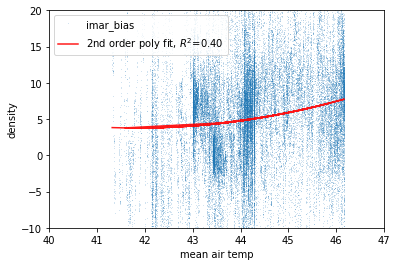

In [21]:
plt.plot(df.imu_temp_C, df.imar_bias, ',', alpha=0.2)
plt.plot(df.imu_temp_C, poly_2.predict(df), 'r-', 
         label='2nd order poly fit, $R^2$=%.2f' % poly_2.rsquared, 
         alpha=0.9)
plt.xlim((40, 47))
plt.ylim((-10, 20))
plt.xlabel('mean air temp')
plt.ylabel('density')
plt.legend(loc="upper left")

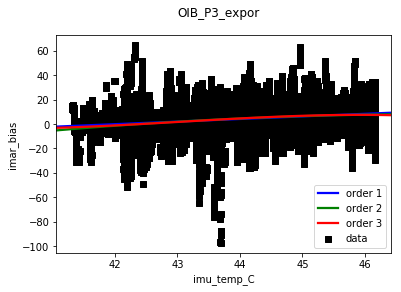

In [22]:
import seaborn as sns
plt.scatter(df['imu_temp_C'], df['imar_bias'], label='data', color='black', marker=',')
sns.regplot(x='imu_temp_C', y='imar_bias', data=df, 
            order=1, 
            color='blue', scatter=None, label='order 1')
sns.regplot(x='imu_temp_C', y='imar_bias', data=df, 
            order=2, 
            color='green', scatter=None, label='order 2')
sns.regplot(x='imu_temp_C', y='imar_bias', data=df, 
            order=3, 
            color='red', scatter=None, label='order 3')
plt.legend()
plt.suptitle(infile[:12])
plt.savefig('figs/' + infile[:12] + '_test_regression_order3.png')